In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_formats = ['svg']
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('./data/car_ad.csv', encoding='ISO-8859-1')
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
mx = df['price'].max()
mn = df['price'].min()

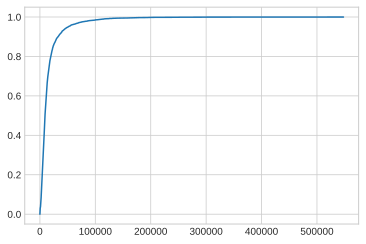

In [4]:
def edf(samples, x):
    return samples[samples < x].shape[0] / samples.shape[0]

ox = np.linspace(mn, mx, 1000)
oy = np.array([edf(df['price'], x) for x in ox])

plt.plot(ox, oy)

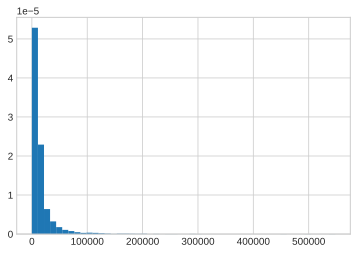

In [5]:
plt.hist(df['price'], density=True, bins=50)
plt.show()

In [6]:
mean = 8
std = 2

samples = np.random.normal(mean, std, size=10000)

samples.mean(), samples.var(ddof=1)

(7.972945402820964, 4.049198827539109)

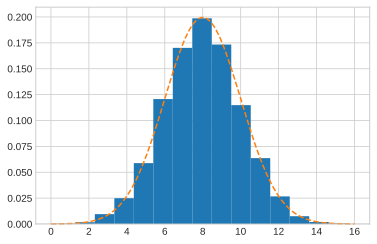

In [7]:
def pdf_normal(mean: float, std: float, x: float) -> float:
    return np.exp(- ((x - mean) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))

ox = np.linspace(0, 16, 1000)
oy = np.array([pdf_normal(mean, std, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy, linestyle='dashed')

## `scipy.stats`

В модуле `stats` из библиотеки `scipy` содержатся реализации основных функций для различных распределений:
* `binom` — биномиальное,
* `poisson` — Пуассоновское,
* `geom` — геометрическое,
* `norm` — нормальное,
* `uniform` — непрерывное равномерное

Доступные функции:
* `pmf` — закон распределения для дискретных величин,
* `pdf` — функция плотности для непрерывных величин,
* `cdf` — функция распределения,
* `ppf` — квантильная функция (обратная к функции распределения)

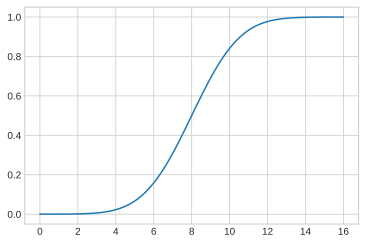

In [8]:
ox = np.linspace(0, 16, 1000)
oy = stats.norm.cdf(ox, loc=8, scale=2)  # в качестве аргумента `x` можно подставлять массив

plt.plot(ox, oy)

In [9]:
norm = stats.norm(loc=8, scale=2)

norm

In [10]:
norm.pdf(6), norm.cdf(6), norm.ppf(0.16)

(0.12098536225957168, 0.15865525393145707, 6.011084233580494)

Для вычисления разброса значений нормально распределённой случайной величины можно использовать следующие правила:

* Интервал от $\mu - \sigma$ до $\mu + \sigma$ (__стандартное отклонение__) содержит около $68\%$ вероятностной массы (т.е. с вероятностью $68\%$ данная величина попадает в этот интервал).
* От $\mu - 2\sigma$ до $\mu + 2\sigma$ — около $95\%$ массы (__правило двух сигм__).
* От $\mu - 3\sigma$ до $\mu + 3\sigma$ — около $99.7\%$ массы (__правило трёх сигм__).

In [11]:
for n in range(1, 4):
    proba = stats.norm.cdf(n) - stats.norm.cdf(-n)
    
    mask = (samples > mean - n * std) & (samples < mean + n * std)
    frac = samples[mask].shape[0] / samples.shape[0]
    
    print(f'Для {n} сигм(ы):\n', f'\tвероятность:\t{proba}\n', f'\tдоля в выборке:\t{frac}')

Для 1 сигм(ы):
 	вероятность:	0.6826894921370859
 	доля в выборке:	0.6795
Для 2 сигм(ы):
 	вероятность:	0.9544997361036416
 	доля в выборке:	0.9522
Для 3 сигм(ы):
 	вероятность:	0.9973002039367398
 	доля в выборке:	0.9976


In [12]:
loc = df['price'].mean()
scale = df['price'].std(ddof=1)

loc, scale

(15633.31731596178, 24106.52343565624)

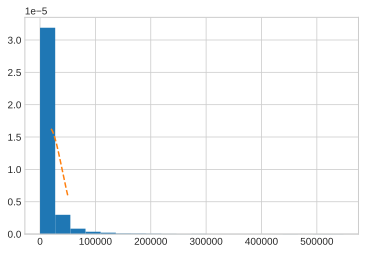

In [13]:
ox = np.linspace(20000, 50000, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['price'], density=True, bins=20)
plt.plot(ox, oy, linestyle='dashed')

plt.show()

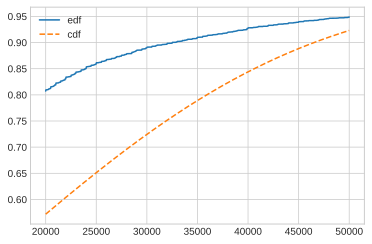

In [14]:
ox = np.linspace(20000, 50000, 1000)
oy1 = np.array([edf(df['price'], x) for x in ox])
oy2 = stats.norm.cdf(ox, loc=loc, scale=scale)

plt.plot(ox, oy1, label='edf')
plt.plot(ox, oy2, linestyle='dashed', label='cdf')

plt.legend()

In [15]:
for n in range(1, 4):
    mask = (df['price'] > loc - n * scale) & (df['price'] < loc + n * scale)

    print(f'Вероятность для {n} сигм(ы):', df[mask].shape[0] / df.shape[0])

Вероятность для 1 сигм(ы): 0.9244987468671679
Вероятность для 2 сигм(ы): 0.9652255639097744
Вероятность для 3 сигм(ы): 0.9810985797827904


### Задание 1. 
Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800].
Найдите ее среднее значение и дисперсию.


In [16]:
A = np.linspace(201, 800, 600)
A.mean(), A.var(ddof=1)

(500.5, 30050.0)

### Задание 2. 
О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2.
Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5?
Если да, найдите ее.


In [17]:
B_var = 0.2
left = 0.5
right = np.math.sqrt(12 * B_var) + left
B_mean = (left + right) / 2

right, B_mean

(2.049193338482967, 1.2745966692414834)

### Задание 3. 
Непрерывная случайная величина X распределена нормально и задана плотностью распределения
f(x) = (1 / (4 * sqrt(2*pi))) * (exp(-(x+2)**2) / 32).

Найдите:

а) M(X)

б) D(X)

в) std(X) (среднее квадратичное отклонение)


In [18]:
X_dx = 16
X_std = np.math.sqrt(X_dx)
X_mx = -2

X_mx, X_dx, X_std

(-2, 16, 4.0)

### Задание 4. 
Рост взрослого населения города X имеет нормальное распределение.
Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.
Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:

a) больше 182 см

b) больше 190 см

c) от 166 см до 190 см

d) от 166 см до 182 см

e) от 158 см до 190 см

f) не выше 150 см или не ниже 190 см

g) не выше 150 см или не ниже 198 см

h) ниже 166 см.


In [19]:
mean_height = 174
std_height = 8
X = stats.norm(loc=mean_height, scale=std_height)
print("a) {}\nb) {}\nc) {}\nd) {}\ne) {}\nf) {}\ng) {}\nh) {}".format(
    X.sf(182),
    X.sf(190),
    X.cdf(190) - X.cdf(166),
    X.cdf(182) - X.cdf(166),
    X.cdf(190) - X.cdf(158),
    X.cdf(150) + X.sf(190),
    X.cdf(150) + X.sf(198),
    X.cdf(166)
))

a) 0.15865525393145707
b) 0.022750131948179195
c) 0.8185946141203637
d) 0.6826894921370859
e) 0.9544997361036416
f) 0.024100029979809288
g) 0.0026997960632601866
h) 0.15865525393145707


### Задание 5. 
На сколько сигм (средних квадратичных отклонений) отклоняется рост человека, равный 190 см, от
математического ожидания роста в популяции, в которой M(X) = 178 см и D(X) = 25 кв.см?


In [20]:
(190 - 178) / 25**(1/2)

2.4